In [1]:
import pandas as pd

In [4]:
uselog = pd.read_csv('use_log.csv')

In [5]:
customer = pd.read_csv('uselog_joined.csv')

In [7]:
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [8]:
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
end_date_c          0
duration            0
dtype: int64

In [9]:
# 利用履歴にもとづいたグループ化　→　教師なし学習のクラスタリング　を行う

In [10]:
# ユーザごとの月内利用履歴に関するデータを変数とする
clustering = customer[["mean", "median", "max", "min", "duration"]]

In [11]:
clustering.head(20)

,mean,median,max,min,duration
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47
5,3.750000,3.5,5,2,47
6,3.916667,3.5,7,2,47
7,4.500000,4.0,9,2,47
8,4.083333,3.5,7,2,47
9,4.666667,4.5,7,3,47


In [12]:
# 最もオーソドックスなクラスタリング手法　K-means法　を使う
# 　→　変数間の距離をベースにクラスタリングを行う
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# 変数間でとりうる絶対値に差がある（durationとその他）ので、標準化が必要
sc = StandardScaler()
clustering_sc = sc.fit_transform(clustering)
print(clustering_sc)
print(len(clustering_sc))

[[-0.28120614 -0.13367635  0.08117747 -0.5336197   2.03402524]
 [-0.14054502 -0.13367635 -0.37992814 -0.02114919  2.03402524]
 [-0.42186727 -0.13367635 -0.84103375 -0.02114919  2.03402524]
 ...
 [ 1.50050144  1.46662237  0.08117747  2.54120338 -1.28811491]
 [ 3.18843493  3.06692109  1.46449428  4.07861492 -1.28811491]
 [ 2.62579043  2.53348819  1.00338868  3.56614441 -1.28811491]]
4192


In [14]:
# K-meansのモデル構築
kmeans = KMeans(n_clusters=4, random_state=0) # グルーピングしたい数を4とする

# クラスタリングの実行
clusters = kmeans.fit(clustering_sc)

# クラスタリング結果を元のデータに反映
clustering["cluster"] = clusters.labels_

C:\Users\likmh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# 4つのグループができたことを確認
clustering["cluster"].unique()

array([3, 1, 0, 2])

In [16]:
clustering

,mean,median,max,min,duration,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,2
4188,10.000000,10.0,10,10,1,2
4189,8.000000,8.0,8,8,1,2
4190,11.000000,11.0,11,11,1,2


In [17]:
# クラスタリング結果の分析

In [18]:
# グループ毎の件数
clustering.columns = ["月内平均値", "月内中央値", "月内最大値", "月内最小値", "会員期間", "cluster"]
clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,763,763,763,763,763
2,846,846,846,846,846
3,1249,1249,1249,1249,1249


In [19]:
# グループ毎の平均値
clustering.groupby("cluster").median()
# この結果から、会員期間に対する変数の特徴が読み取れる

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.583333,5.5,9.0,3.0,16.5
1,3.181818,3.0,5.0,1.0,9.0
2,8.000000,8.0,10.0,6.0,6.0
3,4.666667,5.0,7.0,2.0,37.0


In [20]:
clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.524239,5.375187,8.745877,2.687406,14.843328
1,3.054713,2.888598,4.756225,1.653997,9.263434
2,8.054608,8.039598,10.009456,6.160757,7.072104
3,4.677494,4.671337,7.232986,2.153723,36.915933


In [21]:
# クラスタリング結果の可視化
# 今回扱った5つの変数を、次元削除で二次元座標にプロットする　→　主成分分析
from sklearn.decomposition import PCA

In [22]:
X = clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = clustering["cluster"]

In [23]:
x_pca.shape

(4192, 2)

In [24]:
pca_df.head(10)

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3
5,-2.166995,-1.445346,3
6,-1.709584,-1.673963,3
7,-0.990251,-1.968096,3
8,-1.659636,-1.684252,3
9,-0.969845,-1.734341,3


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
clustering["cluster"].unique()

array([3, 1, 0, 2])

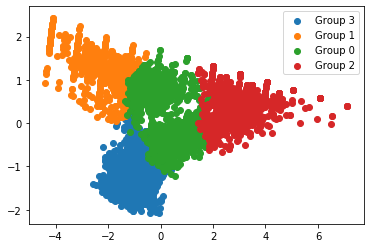

In [27]:
for i in clustering["cluster"].unique():
    temp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(temp[0], temp[1], label="Group " + str(i))
plt.legend()
# 今回作成した２つの軸(変数)がどの変数から成り立っているか分析することで、軸の意味付けができる（ここでは省略）

In [28]:
# クラスタリング結果をもとに退会顧客の傾向を把握する
clustering = pd.concat([clustering, customer], axis=1)

In [29]:
# グループごとの継続/退会
clustering.groupby(["cluster", "is_deleted"], as_index=False).count()[["cluster", "is_deleted", "customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,785
1,0,1,549
2,1,1,763
3,2,0,827
4,2,1,19
5,3,0,1230
6,3,1,19


In [30]:
# グループごとの定期利用フラグ
clustering.groupby(["cluster", "routine_flg"], as_index=False).count()[["cluster", "routine_flg", "customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,228
1,0,1,1106
2,1,0,497
3,1,1,266
4,2,0,52
5,2,1,794
6,3,0,2
7,3,1,1247


In [31]:
# 翌月の利用回数の予測

In [32]:
# 教師あり学習：数字データを用いる「回帰」

In [33]:
# 生データをもう一度読み込んで集計しなおす
uselog = pd.read_csv('use_log.csv')

In [34]:
uselog.head(10)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
5,L00000049012335,AS077151,2018-04-01
6,L00000049012336,AS161071,2018-04-01
7,L00000049012337,AS170379,2018-04-01
8,L00000049012338,AS186727,2018-04-01
9,L00000049012339,AS193568,2018-04-01


In [35]:
uselog["usedate"] =  pd.to_datetime(uselog["usedate"])
uselog["ym"] = uselog["usedate"].dt.strftime("%Y%m")
uselog.head()

,log_id,customer_id,usedate,ym
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [36]:
uselog_months = uselog.groupby(["ym", "customer_id"], as_index=False).count()
uselog_months.head()

,ym,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [37]:
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]

In [38]:
uselog_months.head()

,ym,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [39]:
# 年月のリスト化
yms = list(uselog_months["ym"].unique())
yms

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

In [40]:
predict_data = pd.DataFrame()

In [41]:
# 予測のための準備　→　教師データの作成
for i in range(6, len(yms)):
    tmp = uselog_months.loc[uselog_months["ym"]==yms[i]]
    tmp.rename(columns={"count":"count_pred"}, inplace=True)
    for j in range(1, 7):
        tmp_before = uselog_months.loc[uselog_months["ym"]==yms[i-j]]
        del tmp_before["ym"]
        tmp_before.rename(columns={"count":"count_{}".format(j-1)}, inplace=True)
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)

C:\Users\likmh\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
predict_data.head()
# ymの年月の利用回数がcount_pred（未知）
# その前月を当月（既知）として、0ヶ月前、1ヶ月前、2ヶ月前...として列を追加して拡張していく
# これを201810の予測, 201811の予測, 201812の予想, ... と繰り返す

,ym,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [43]:
# 一応、先頭行の「AS002855」で数字が正しいことを確認
uselog_months.loc[uselog_months["customer_id"]=="AS002855"]

,ym,customer_id,count
0,201804,AS002855,4
2991,201805,AS002855,5
6054,201806,AS002855,5
9158,201807,AS002855,5
12291,201808,AS002855,3
15424,201809,AS002855,7
18532,201810,AS002855,3
21602,201811,AS002855,5
24647,201812,AS002855,2
27760,201901,AS002855,6


In [44]:
# 会員期間が6ヶ月未満だと欠損値になっているので、６ヶ月以上継続している会員のデータに絞る
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)

In [45]:
predict_data.head()

,ym,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [46]:
# 基本データができたので、特徴づけるための変数を付与する
# 今回は会員期間を追加
predict_data = pd.merge(predict_data, customer[["customer_id", "start_date"]], on="customer_id", how="left")
predict_data.head()

,ym,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [47]:
predict_data["now_date"] = pd.to_datetime(predict_data["ym"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
from dateutil.relativedelta import relativedelta
predict_data["period"] = None

In [48]:
len(predict_data)

15113

In [49]:
for i in range(1, len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = delta.years*12 + delta.months
predict_data.head()

C:\Users\likmh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ym,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,None
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [50]:
predict_data

,ym,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,None
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2019-03-01,42
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2019-03-01,6
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2019-03-01,33
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2019-03-01,24


In [51]:
# 予測モデルの作成

In [52]:
# 入店時期のデータが存在しない安定状態の顧客は除外してモデル作成する
# = 2018/04以降に入会した顧客
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]
predict_data2 = predict_data
predict_data = predict_data.reset_index(drop=True)

In [53]:
predict_data.head()

,ym,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
1,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
2,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
3,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
4,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5


In [54]:
# 線形回帰モデル LinearRegression
from sklearn import linear_model
import sklearn.model_selection as mdsct

In [55]:
# モデルの初期化
model = linear_model.LinearRegression()

In [56]:
# 説明変数X：予測に使う変数
X = predict_data[["count_0", "count_1", "count_2", "count_3", "count_4", "count_5", "period"]]

In [57]:
# 目的変数ｙ：予測したい変数
y = predict_data["count_pred"]

In [58]:
# 学習用データと評価用データに分割　デフォルトは学習：評価＝３：１
X_train, X_test, y_train, y_test = mdsct.train_test_split(X, y)
# 機械学習はあくまでも未知のデータを予測するのが目的であり、
# 学習用のデータに過剰に適合すると、未知のデータに対応できなくなってしまう（過学習状態）
# そのため、学習用データで学習し、その精度の検証を未知のデータとして残した評価用データで行う

In [59]:
# 学習用データを用いたモデル作成
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# 学習用データでの精度の評価
print(model.score(X_train, y_train))

0.6054240398641146


In [61]:
# 評価用データでの精度の評価
print(model.score(X_test, y_test))

0.6120584986413926


In [62]:
# モデルに寄与している変数を確認する
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})

In [63]:
coef
# 直近一ヶ月の利用回数が最も翌月の利用回数に影響していることがわかる

,feature_names,coefficient
0,count_0,0.314374
1,count_1,0.201067
2,count_2,0.174477
3,count_3,0.175209
4,count_4,0.092752
5,count_5,0.056194
6,period,0.075114


In [64]:
# 来月の利用回数を予測する
x1 = [3,4,4,6,8,7,8]
x2 = [2,2,3,3,4,6,8]
x_pred = [x1, x2]
model.predict(x_pred)

array([3.82421121, 1.98039973])

In [65]:
# uselog_monthsデータの出力
uselog_months.to_csv("use_log_months")